In [1]:
import pydicom 
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2

In [2]:

def load_dicom_series(dicom_dir):
    """
    Loads a DICOM series from a directory and return a 3D numpy array.
    """
    # list files
    dicom_files = sorted([os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith('.DCM')])
    
    # read dcm 
    slices = [pydicom.dcmread(dcm) for dcm in dicom_files]
    slices.sort(key=lambda x: int(x.InstanceNumber))  # Sort by slice order
    
    # stack and make into 3d volume
    volume = np.stack([s.pixel_array for s in slices], axis=-1)
    return volume


def plot_slice(volume, x=None, y=None, z=None):
    if x is not None:
        slice_2d = volume[x, :, :]
        title = f'Slice at X={x}'
    elif y is not None:
        slice_2d = volume[:, y, :]
        title = f'Slice at Y={y}'
    elif z is not None:
        slice_2d = volume[:, :, z]
        title = f'Slice at Z={z}'
    else:
        raise ValueError("One of x, y, or z must be specified")
    
    return slice_2d, title

In [25]:
base_path = '../../data/imrh_114a'
directories = os.listdir(base_path)
valid_dirs = [d for d in directories if d.startswith('imoco_recon_')]
slice_path = os.path.join(base_path, 'slices')

for subdir in valid_dirs:
    dicom_dir = os.path.join(base_path, subdir)
    print(f"Processing directory: {dicom_dir}")
    
    
    recon_value = subdir.split('_')[-1]
    
    dicom_load = load_dicom_series(dicom_dir)
    x_slice = 120
    slice_2d, title = plot_slice(dicom_load, x=x_slice)
    

    output_filename = f"lammy{recon_value}_slice120.png"
    output_path = os.path.join(slice_path, output_filename)
    
    os.makedirs(slice_path, exist_ok=True)
    
    plt.imsave(output_path, slice_2d, cmap='gray')
    print(f"Slice saved at: {output_path}")

print("Processing complete.")

Processing directory: ../../data/imrh_114a/imoco_recon_0.05
Slice saved at: ../../data/imrh_114a/slices/lammy0.05_slice120.png
Processing directory: ../../data/imrh_114a/imoco_recon_0.075
Slice saved at: ../../data/imrh_114a/slices/lammy0.075_slice120.png
Processing directory: ../../data/imrh_114a/imoco_recon_0.1
Slice saved at: ../../data/imrh_114a/slices/lammy0.1_slice120.png
Processing directory: ../../data/imrh_114a/imoco_recon_0
Slice saved at: ../../data/imrh_114a/slices/lammy0_slice120.png
Processing directory: ../../data/imrh_114a/imoco_recon_0.025
Slice saved at: ../../data/imrh_114a/slices/lammy0.025_slice120.png
Processing directory: ../../data/imrh_114a/imoco_recon_0.01
Slice saved at: ../../data/imrh_114a/slices/lammy0.01_slice120.png
Processing complete.


In [23]:
directories

['imoco_recon_0.05',
 '.DS_Store',
 'imoco_recon_0.075',
 'slices',
 'imoco_recon_0.1',
 'imoco_recon_0',
 'imoco_recon_0.025',
 'imoco_recon_0.01']

In [19]:
base_path = '../../data/imrh_114a'
directories = os.listdir(base_path)
valid_dirs = [d for d in directories if d.startswith('imoco_recon_')]
slice_path = os.path.join(base_path, 'slices')

def plot_multiple_slices(dicom_load, x_coords):
    fig, axs = plt.subplots(1, len(x_coords), figsize=(20, 5))
    for ax, x_coord in zip(axs, x_coords):
        slice_2d, title = plot_slice(dicom_load, x=x_coord)
        ax.imshow(slice_2d, cmap='gray')
        ax.set_title(f'x = {x_coord}')
    plt.tight_layout()
    return fig

for subdir in valid_dirs:
    dicom_dir = os.path.join(base_path, subdir)
    print(f"Processing directory: {dicom_dir}")
    
    recon_value = subdir.split('_')[-1]
    
    dicom_load = load_dicom_series(dicom_dir)

    x_coords = np.arange(105, 126, 5)
    
    # Save individual slices
    for x_coord in x_coords:
        slice_2d, _ = plot_slice(dicom_load, x=x_coord)
        
        slice_filename = f"lammy{recon_value}_slice{x_coord}.png"
        slice_file_path = os.path.join(slice_path, slice_filename)
        
        os.makedirs(slice_path, exist_ok=True)
        
        plt.imsave(slice_file_path, slice_2d, cmap='gray')
        print(f"Slice at x={x_coord} saved at: {slice_file_path}")
    
    # Create and display multi-slice plot (for notebook visualization)
    fig = plot_multiple_slices(dicom_load, x_coords)
    plt.show()  
    plt.close(fig)

print("Processing complete.")

['imoco_recon_0.05',
 '.DS_Store',
 'imoco_recon_0.075',
 'slices',
 'imoco_recon_0.1',
 'imoco_recon_0',
 'imoco_recon_0.025',
 'imoco_recon_0.01']

In [3]:
dicom_dir = '../../data/imrh_114a/imoco_recon_0/'
dicom_dir = '../../data/imrh_114a/imoco_recon_0/'
dicom_load = load_dicom_series(dicom_dir)

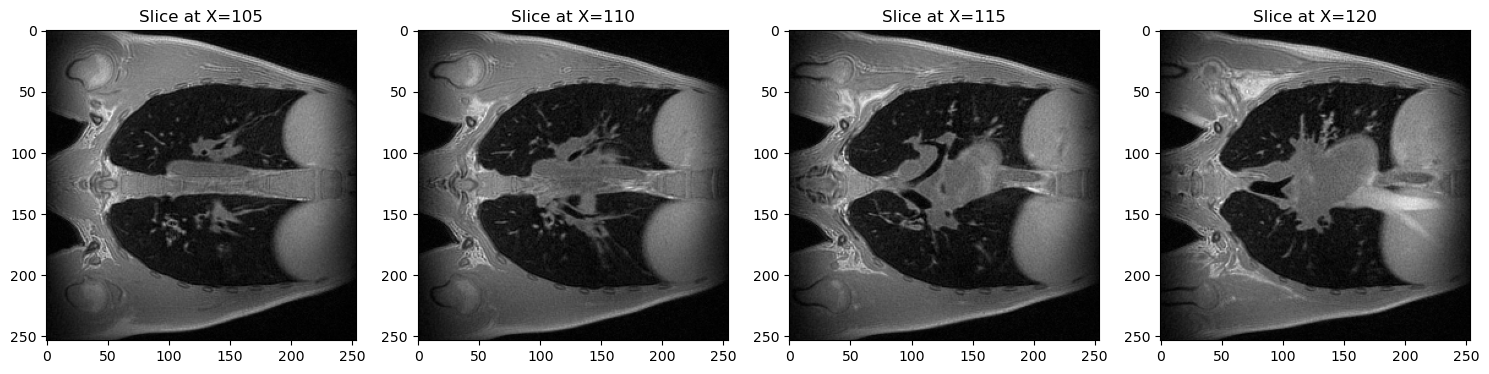

In [4]:

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for ax, x_coord in zip(axs,np.arange(105,125,5)): 
    slice_2d, title = plot_slice(dicom_load, x=x_coord)
    ax.imshow(slice_2d, cmap='gray')
    ax.set_title(title)

plt.tight_layout()
plt.show()

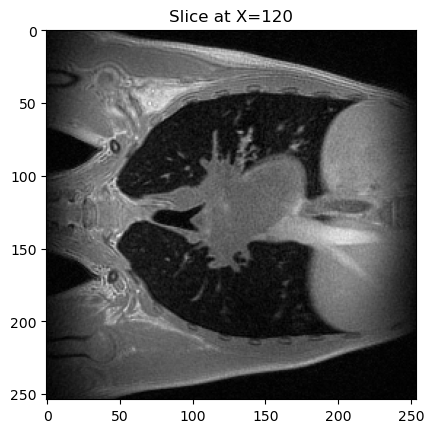

In [5]:
slice_2d, title = plot_slice(dicom_load, x=120)
plt.imshow(slice_2d, cmap='gray')
plt.title(title)
plt.show()

In [19]:
plt.imsave('../../data/imrh_114a/slices/lammy0_slice120.png',slice_2d, cmap='gray')

In [11]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

from mpl_interactions import image_segmenter

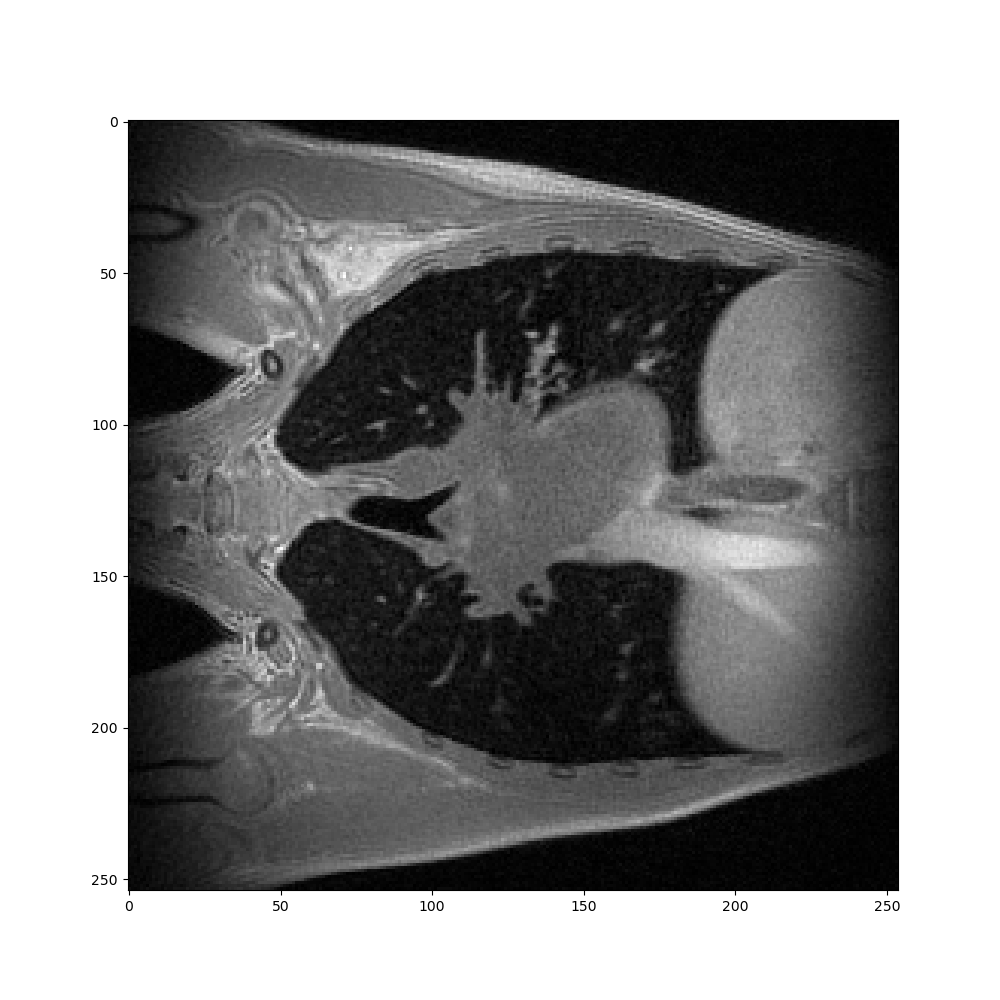

In [16]:
segmenter = image_segmenter(slice_2d, nclasses = 1, mask_colors='red', mask_alpha=.76, cmap = "gray")
display(segmenter) 

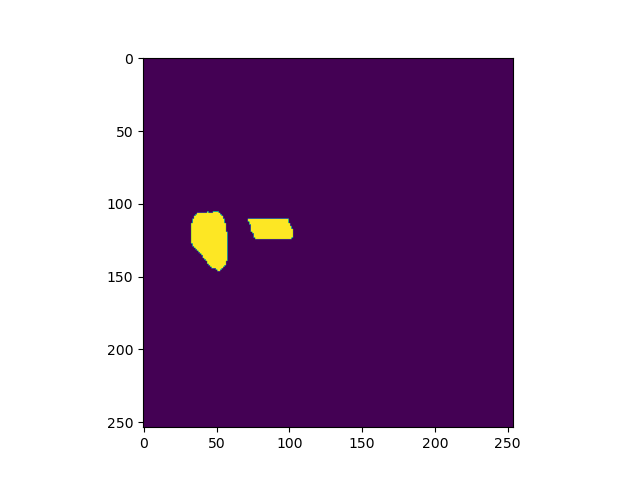

In [17]:
plt.figure()
plt.imshow(segmenter.mask)